<a href="https://colab.research.google.com/github/sean-halpin/chess_website/blob/models_init/models/Chess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Lichess Puzzles

In [2]:
!pip install zstandard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 22.5 MB/s eta 0:00:00


In [3]:
import requests
import zstandard
import csv
import io

url = "https://database.lichess.org/lichess_db_puzzle.csv.zst"
compressed_file_path = "lichess_db_puzzle.csv.zst"
output_csv_path = "lichess_db_puzzle.csv"

# Download the Zstandard compressed file
response = requests.get(url)
if response.status_code == 200:
    with open(compressed_file_path, 'wb') as file:
        file.write(response.content)
    print(f"File downloaded successfully to {compressed_file_path}")
else:
    print(f"Failed to download the file. Status code: {response.status_code}")

# Extract the Zstandard compressed file to CSV
with open(compressed_file_path, 'rb') as compressed_file:
    dctx = zstandard.ZstdDecompressor()
    with dctx.stream_reader(compressed_file) as reader:
        with io.TextIOWrapper(reader, encoding='utf-8') as text_reader:
            with open(output_csv_path, 'w', newline='', encoding='utf-8') as output_csv:
                writer = csv.writer(output_csv)

                for line in text_reader:
                    decoded_line = line.strip()
                    csv_row = decoded_line.split(',')
                    writer.writerow(csv_row)

print(f"File extracted successfully to {output_csv_path}")


File downloaded successfully to lichess_db_puzzle.csv.zst
File extracted successfully to lichess_db_puzzle.csv


# Load Puzzle Data

In [4]:
import pandas as pd

# Specify the path to your CSV file
csv_file_path = "lichess_db_puzzle.csv"

# Use read_csv to load the data into a DataFrame
df = pd.read_csv(csv_file_path, sep=",")

# df_description = df.describe()

# # Print the summary
# print(df_description)

# Explore Data

In [5]:
# Display the first few rows of the DataFrame to verify the data has been loaded
pd.set_option('display.max_rows', None)
print(df.dtypes)
df.head(100)

PuzzleId           object
FEN                object
Moves              object
Rating              int64
RatingDeviation     int64
Popularity          int64
NbPlays             int64
Themes             object
GameUrl            object
OpeningTags        object
dtype: object


,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags
0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1840,74,94,5370,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#47,NaN
1,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1491,74,96,25163,advantage endgame short,https://lichess.org/F8M8OS71#52,NaN
2,0008Q,8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64,e7f7 f5e5 e2f1 e5e6,1276,76,90,495,advantage endgame rookEndgame short,https://lichess.org/MQSyb3KW#126,NaN
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4,1086,74,87,556,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#31,Kings_Pawn_Game Kings_Pawn_Game_Leonardis_Vari...
4,000Vc,8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53,g4h5 g6h5 f4f5 e6e5 f5f6 e5f6,1556,81,73,90,crushing endgame long pawnEndgame,https://lichess.org/l6AejDMO#104,NaN
5,000Zo,4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...,e5f6 e8e1 g1f2 e1f1,1365,75,93,517,endgame mate mateIn2 short,https://lichess.org/n8Ff742v#68,NaN
6,000aY,r4rk1/pp3ppp/2n1b3/q1pp2B1/8/P1Q2NP1/1PP1PP1P/...,g5e7 a5c3 b2c3 c6e7,1435,79,73,502,advantage master middlegame short,https://lichess.org/iihZGl6t#28,Benoni_Defense Benoni_Defense_Benoni-Indian_De...
7,000hf,r1bqk2r/pp1nbNp1/2p1p2p/8/2BP4/1PN3P1/P3QP1P/3...,e8f7 e2e6 f7f8 e6f7,1554,75,89,469,mate mateIn2 middlegame short,https://lichess.org/71ygsFeE/black#37,Horwitz_Defense Horwitz_Defense_Other_variations
8,000mr,5r1k/5rp1/p7/1b2B2p/1P1P1Pq1/2R1Q3/P3p1P1/2R3K...,e3g3 f7f4 e5f4 f8f4,1941,85,62,92,crushing middlegame short,https://lichess.org/8sVpuwso#80,NaN
9,000qP,8/7R/8/5p2/4bk1P/8/2r2K2/6R1 w - - 7 51,f2f1 f4f3 f1e1 c2c1 e1d2 c1g1,2061,74,92,233,crushing endgame exposedKing long skewer,https://lichess.org/r4xUR6fC#100,NaN


In [6]:
print(df.dtypes)
df.describe()

PuzzleId           object
FEN                object
Moves              object
Rating              int64
RatingDeviation     int64
Popularity          int64
NbPlays             int64
Themes             object
GameUrl            object
OpeningTags        object
dtype: object


,Rating,RatingDeviation,Popularity,NbPlays
count,3.709215e+06,3.709215e+06,3.709215e+06,3.709215e+06
mean,1.522178e+03,9.036672e+01,8.337386e+01,1.624503e+03
std,5.401437e+02,4.350209e+01,2.170697e+01,4.345359e+03
min,3.990000e+02,4.900000e+01,-1.000000e+02,0.000000e+00
25%,1.092000e+03,7.500000e+01,8.200000e+01,9.200000e+01
50%,1.485000e+03,7.800000e+01,8.900000e+01,3.630000e+02
75%,1.923000e+03,8.800000e+01,9.300000e+01,1.292000e+03
max,3.330000e+03,5.000000e+02,1.020000e+02,1.007612e+06


In [7]:
pd.set_option('display.max_columns', None)

In [8]:
print(df.iloc[84]['FEN'])
print(df.iloc[84]['Moves'])

r6k/2q3pp/8/2p1n3/R1Qp4/7P/2PB1PP1/6K1 b - - 0 32
e5c4 a4a8 c7b8 a8b8


In [9]:
# Select only the FEN and moves columns
selected_columns = ["FEN", "Moves"]
df_subset = df[selected_columns]

In [10]:
df_subset.head()

,FEN,Moves
0,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1
1,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8
2,8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64,e7f7 f5e5 e2f1 e5e6
3,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4
4,8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53,g4h5 g6h5 f4f5 e6e5 f5f6 e5f6


In [11]:
df_subset.iloc[84]

FEN      r6k/2q3pp/8/2p1n3/R1Qp4/7P/2PB1PP1/6K1 b - - 0 32
Moves                                  e5c4 a4a8 c7b8 a8b8
Name: 84, dtype: object

In [12]:
!pip install python-chess

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.8 MB/s eta 0:00:00


In [13]:
def move_to_index(move):
    """
    Convert chess move (e.g., "e2e4") to index number based on the specified mapping.
    """
    file_mapping = {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7}
    rank_mapping = {str(i+1): i * 8 for i in range(8)}

    start_square = move[:2]
    end_square = move[2:4]

    start_index = file_mapping[start_square[0]] + rank_mapping[start_square[1]]
    end_index = file_mapping[end_square[0]] + rank_mapping[end_square[1]]

    return start_index, end_index


move_to_index("e2e4")

(12, 28)

In [14]:
def chess_move_one_hot_encoding(chess_move):
    # Create an empty dictionary to map squares to column names
    square_columns = {}
    columns = []

    # Define the columns based on chess board squares
    for file in 'abcdefgh':
        for rank in '12345678':
            square = file + rank
            from_col_name = 'from_' + square
            to_col_name = 'to_' + square
            columns.extend([from_col_name, to_col_name])
            square_columns[square] = (from_col_name, to_col_name)

    # Initialize a dictionary to store the one-hot encoded values
    encoding = {col: 0 for col in columns}

    # Extract the "from" and "to" squares from the chess move
    from_square = chess_move[:2]
    to_square = chess_move[2:4]

    # Update the corresponding columns to 1
    encoding[square_columns[from_square][0]] = 1
    encoding[square_columns[to_square][1]] = 1

    return encoding

# Example usage:
chess_move = "e2e4"
one_hot_encoding = chess_move_one_hot_encoding(chess_move)
print(one_hot_encoding)
print(list(one_hot_encoding.values()))


{'from_a1': 0, 'to_a1': 0, 'from_a2': 0, 'to_a2': 0, 'from_a3': 0, 'to_a3': 0, 'from_a4': 0, 'to_a4': 0, 'from_a5': 0, 'to_a5': 0, 'from_a6': 0, 'to_a6': 0, 'from_a7': 0, 'to_a7': 0, 'from_a8': 0, 'to_a8': 0, 'from_b1': 0, 'to_b1': 0, 'from_b2': 0, 'to_b2': 0, 'from_b3': 0, 'to_b3': 0, 'from_b4': 0, 'to_b4': 0, 'from_b5': 0, 'to_b5': 0, 'from_b6': 0, 'to_b6': 0, 'from_b7': 0, 'to_b7': 0, 'from_b8': 0, 'to_b8': 0, 'from_c1': 0, 'to_c1': 0, 'from_c2': 0, 'to_c2': 0, 'from_c3': 0, 'to_c3': 0, 'from_c4': 0, 'to_c4': 0, 'from_c5': 0, 'to_c5': 0, 'from_c6': 0, 'to_c6': 0, 'from_c7': 0, 'to_c7': 0, 'from_c8': 0, 'to_c8': 0, 'from_d1': 0, 'to_d1': 0, 'from_d2': 0, 'to_d2': 0, 'from_d3': 0, 'to_d3': 0, 'from_d4': 0, 'to_d4': 0, 'from_d5': 0, 'to_d5': 0, 'from_d6': 0, 'to_d6': 0, 'from_d7': 0, 'to_d7': 0, 'from_d8': 0, 'to_d8': 0, 'from_e1': 0, 'to_e1': 0, 'from_e2': 1, 'to_e2': 0, 'from_e3': 0, 'to_e3': 0, 'from_e4': 0, 'to_e4': 1, 'from_e5': 0, 'to_e5': 0, 'from_e6': 0, 'to_e6': 0, 'from_e7': 

In [15]:
import chess

# Iterate through each row in the DataFrame
for index, row in df_subset.head(1).iterrows():
    # Get the FEN string from the current row
    fen_string = row["FEN"]

    # Create a chess.Board object from the FEN string
    board = chess.Board(fen_string)

    for move in row["Moves"].split(" "):
      # Print the board state and moves
      print(move, "\n")
      print(f"Board state for puzzle {index + 1} (FEN: {board.board_fen()}):")
      print(board)
      print("Moves:", row["Moves"])
      print("\n" + "=" * 30 + "\n")
      # Extract and print the piece at each square
      i=0
      for square in chess.SQUARES:
          piece = board.piece_at(square)
          print(f"{i} - Square {chess.square_name(square)}: {piece}")
          i+=1
      print(move_to_index(move))
      m = chess.Move.from_uci(move)
      board.push(m)  # Make the move
      break


f2g3 

Board state for puzzle 1 (FEN: r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K):
r . . . . . . k
p p . . r . . p
. . . . R p . Q
. . . p . . . .
. . . . . . . .
. N . P . . R .
P q P . . b P P
. . . . . . . K
Moves: f2g3 e6e7 b2b1 b3c1 b1c1 h6c1


0 - Square a1: None
1 - Square b1: None
2 - Square c1: None
3 - Square d1: None
4 - Square e1: None
5 - Square f1: None
6 - Square g1: None
7 - Square h1: K
8 - Square a2: P
9 - Square b2: q
10 - Square c2: P
11 - Square d2: None
12 - Square e2: None
13 - Square f2: b
14 - Square g2: P
15 - Square h2: P
16 - Square a3: None
17 - Square b3: N
18 - Square c3: None
19 - Square d3: P
20 - Square e3: None
21 - Square f3: None
22 - Square g3: R
23 - Square h3: None
24 - Square a4: None
25 - Square b4: None
26 - Square c4: None
27 - Square d4: None
28 - Square e4: None
29 - Square f4: None
30 - Square g4: None
31 - Square h4: None
32 - Square a5: None
33 - Square b5: None
34 - Square c5: None
35 - Square d5: p
36 - Square e5: None
37 - Square f5: N

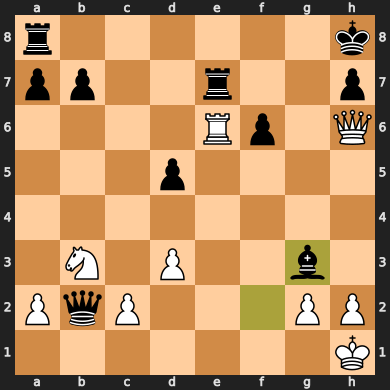

In [16]:
board

In [17]:
print(dir(board.piece_at(15)))
print(board.piece_at(15).piece_type)
print(board.piece_at(22).color)
print(board.piece_at(22).symbol())

['__annotations__', '__class__', '__dataclass_fields__', '__dataclass_params__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__match_args__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_repr_svg_', 'color', 'from_symbol', 'piece_type', 'symbol', 'unicode_symbol']
1
False
b


In [18]:
print(board.piece_at(44).__str__())
print(board.piece_at(0).__str__())

R
None


# Prepare Data

In [19]:
sample_count = 100_000
sampled_df = df_subset.sample(n=sample_count, random_state=42)

In [20]:
# Create an empty list to store row data
rows_data = []

i=0
# Iterate through each row in the DataFrame
for index, row in sampled_df.iterrows():
    # Get the FEN string from the current row
    fen_string = row["FEN"]

    # Create a chess.Board object from the FEN string
    try:
        board = chess.Board(fen_string)
    except:
        print("An exception occurred")
        continue

    # Not Good moves
    nextMove = row["Moves"].split(" ")[0]
    if board.legal_moves.count() > 2:
      for move in list(board.legal_moves)[:2]:
          # Extract the piece at each square and append to row_data
          move = move.uci()
          if nextMove != move:
            row_data = [board.piece_at(square).__str__() for square in chess.SQUARES]

            # Append the move index to row_data
            row_data.extend(chess_move_one_hot_encoding(move).values())
            # not good move
            row_data.extend(list([0]))
            # Append the row_data to the list
            rows_data.append(row_data)

    # Good moves
    for move in row["Moves"].split(" "):
        # Extract the piece at each square and append to row_data
        row_data = [board.piece_at(square).__str__() for square in chess.SQUARES]

        # Append the move index to row_data
        row_data.extend(chess_move_one_hot_encoding(move).values())
        # good move
        row_data.extend(list([1]))
        # Make the move on the board
        m = chess.Move.from_uci(move)
        board.push(m)
        # Append the row_data to the list
        rows_data.append(row_data)
    i+=1
    if i % 5000 == 0:
      print(f"{i} of {sample_count}")

# Create the result DataFrame in a single step
columns = [f"Square_{i}" for i in range(64)] + list(chess_move_one_hot_encoding("a2a4").keys()) + list(["good_move"])
print(columns)
result_df = pd.DataFrame(rows_data, columns=columns)

5000 of 100000
10000 of 100000
15000 of 100000
20000 of 100000
25000 of 100000
30000 of 100000
35000 of 100000
40000 of 100000
45000 of 100000
50000 of 100000
55000 of 100000
60000 of 100000
65000 of 100000
70000 of 100000
75000 of 100000
80000 of 100000
85000 of 100000
90000 of 100000
95000 of 100000
100000 of 100000
['Square_0', 'Square_1', 'Square_2', 'Square_3', 'Square_4', 'Square_5', 'Square_6', 'Square_7', 'Square_8', 'Square_9', 'Square_10', 'Square_11', 'Square_12', 'Square_13', 'Square_14', 'Square_15', 'Square_16', 'Square_17', 'Square_18', 'Square_19', 'Square_20', 'Square_21', 'Square_22', 'Square_23', 'Square_24', 'Square_25', 'Square_26', 'Square_27', 'Square_28', 'Square_29', 'Square_30', 'Square_31', 'Square_32', 'Square_33', 'Square_34', 'Square_35', 'Square_36', 'Square_37', 'Square_38', 'Square_39', 'Square_40', 'Square_41', 'Square_42', 'Square_43', 'Square_44', 'Square_45', 'Square_46', 'Square_47', 'Square_48', 'Square_49', 'Square_50', 'Square_51', 'Square_52', 

In [21]:
move

'f6e4'

In [22]:
result_df.head(4)

,Square_0,Square_1,Square_2,Square_3,Square_4,Square_5,Square_6,Square_7,Square_8,Square_9,Square_10,Square_11,Square_12,Square_13,Square_14,Square_15,Square_16,Square_17,Square_18,Square_19,Square_20,Square_21,Square_22,Square_23,Square_24,Square_25,Square_26,Square_27,Square_28,Square_29,Square_30,Square_31,Square_32,Square_33,Square_34,Square_35,Square_36,Square_37,Square_38,Square_39,Square_40,Square_41,Square_42,Square_43,Square_44,Square_45,Square_46,Square_47,Square_48,Square_49,Square_50,Square_51,Square_52,Square_53,Square_54,Square_55,Square_56,Square_57,Square_58,Square_59,Square_60,Square_61,Square_62,Square_63,from_a1,to_a1,from_a2,to_a2,from_a3,to_a3,from_a4,to_a4,from_a5,to_a5,from_a6,to_a6,from_a7,to_a7,from_a8,to_a8,from_b1,to_b1,from_b2,to_b2,from_b3,to_b3,from_b4,to_b4,from_b5,to_b5,from_b6,to_b6,from_b7,to_b7,from_b8,to_b8,from_c1,to_c1,from_c2,to_c2,from_c3,to_c3,from_c4,to_c4,from_c5,to_c5,from_c6,to_c6,from_c7,to_c7,from_c8,to_c8,from_d1,to_d1,from_d2,to_d2,from_d3,to_d3,from_d4,to_d4,from_d5,to_d5,from_d6,to_d6,from_d7,to_d7,from_d8,to_d8,from_e1,to_e1,from_e2,to_e2,from_e3,to_e3,from_e4,to_e4,from_e5,to_e5,from_e6,to_e6,from_e7,to_e7,from_e8,to_e8,from_f1,to_f1,from_f2,to_f2,from_f3,to_f3,from_f4,to_f4,from_f5,to_f5,from_f6,to_f6,from_f7,to_f7,from_f8,to_f8,from_g1,to_g1,from_g2,to_g2,from_g3,to_g3,from_g4,to_g4,from_g5,to_g5,from_g6,to_g6,from_g7,to_g7,from_g8,to_g8,from_h1,to_h1,from_h2,to_h2,from_h3,to_h3,from_h4,to_h4,from_h5,to_h5,from_h6,to_h6,from_h7,to_h7,from_h8,to_h8,good_move
0,None,None,None,R,R,B,K,None,P,P,None,None,None,P,P,P,Q,None,P,None,None,None,B,None,None,None,None,None,N,None,None,None,None,None,p,None,n,b,p,None,None,q,None,None,r,None,None,p,p,p,None,None,None,p,b,None,None,None,None,None,r,None,k,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,None,None,None,R,R,B,K,None,P,P,None,None,None,P,P,P,Q,None,P,None,None,None,B,None,None,None,None,None,N,None,None,None,None,None,p,None,n,b,p,None,None,q,None,None,r,None,None,p,p,p,None,None,None,p,b,None,None,None,None,None,r,None,k,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,None,None,None,R,R,B,K,None,P,P,None,None,None,P,P,P,Q,None,P,None,None,None,B,None,None,None,None,None,N,None,None,None,None,None,p,None,n,b,p,None,None,q,None,None,r,None,None,p,p,p,None,None,None,p,b,None,None,None,None,None,r,None,k,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,None,None,None,R,R,B,K,None,P,P,None,None,None,P,P,P,Q,None,P,None,None,None,B,None,None,None,None,None,None,None,None,None,None,None,N,None,n,b,p,None,None,q,None,None,r,None,None,p,p,p,None,None,None,p,b,None,None,None,None,None,r,None,k,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [23]:
sampled_df.head(1)

,FEN,Moves
1158501,4r1k1/pp3pb1/1q2r2p/2p1nbp1/4N3/Q1P3B1/PP3PPP/...,e4c5 e5f3 g2f3 e6e1 d1e1 e8e1


In [24]:
result_df.dtypes

Square_0     object
Square_1     object
Square_2     object
Square_3     object
Square_4     object
Square_5     object
Square_6     object
Square_7     object
Square_8     object
Square_9     object
Square_10    object
Square_11    object
Square_12    object
Square_13    object
Square_14    object
Square_15    object
Square_16    object
Square_17    object
Square_18    object
Square_19    object
Square_20    object
Square_21    object
Square_22    object
Square_23    object
Square_24    object
Square_25    object
Square_26    object
Square_27    object
Square_28    object
Square_29    object
Square_30    object
Square_31    object
Square_32    object
Square_33    object
Square_34    object
Square_35    object
Square_36    object
Square_37    object
Square_38    object
Square_39    object
Square_40    object
Square_41    object
Square_42    object
Square_43    object
Square_44    object
Square_45    object
Square_46    object
Square_47    object
Square_48    object
Square_49    object


# Create Model

In [25]:
!pip install torch pandas scikit-learn

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd


temp_df = result_df
# Replace 'Square_' columns with numerical labels
label_encoder = LabelEncoder()
for column in temp_df.columns:
    if column.startswith('Square_'):
        temp_df[column] = label_encoder.fit_transform(temp_df[column])

# Convert 'good_move' column to tensor
labels = torch.tensor(temp_df['good_move'].values, dtype=torch.float32)

# Drop unnecessary columns (e.g., 'good_move') for input features
features = temp_df.drop(columns=['good_move'])

# Convert the remaining DataFrame to tensor
features = torch.tensor(features.values, dtype=torch.float32)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=42)

# Define the PyTorch dataset
class ChessDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# Create DataLoader instances
train_dataset = ChessDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

val_dataset = ChessDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Define a simple neural network model
class ChessModel(nn.Module):
    def __init__(self, input_size):
        super(ChessModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# Instantiate the model and move it to GPU if available
model = ChessModel(input_size=features.size(1))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 1

for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        val_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            val_loss += loss.item()

            predicted = (outputs > 0.68).float().flatten()
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        accuracy = correct / total
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {val_loss/len(val_loader)}, Accuracy: {accuracy}")


Epoch 1/1, Loss: 0.37252440656021096, Accuracy: 0.8220745605563068


In [27]:
# Save the model
torch.save(model.state_dict(), 'chess_model.pth')


In [28]:
predicted = (outputs > 0.5).float().flatten()
correct = (predicted == labels).sum().item()
correct

14

In [29]:
print(predicted)
print(labels)

tensor([1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       device='cuda:0')
tensor([1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.],
       device='cuda:0')


In [30]:
len(predicted)

17

# ONNX Model

In [31]:
!pip install onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 49.5 MB/s eta 0:00:00


In [32]:
inputs.shape

torch.Size([17, 192])

In [33]:
64+64+64

192

In [49]:
!pip install onnx2tf

In [52]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [53]:
!pip install onnx-graphsurgeon

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!git clone https://github.com/NVIDIA/TensorRT.git

In [56]:
!pip install ./TensorRT/tools/onnx-graphsurgeon

Processing ./TensorRT/tools/onnx-graphsurgeon
  Preparing metadata (setup.py) ... done
  Created wheel for onnx-graphsurgeon: filename=onnx_graphsurgeon-0.3.26-py2.py3-none-any.whl size=41236 sha256=05da101ecf84ab6aa5a790182dd2d62fc14d5264c43dd23f3e47d8f563f2d720
  Stored in directory: /root/.cache/pip/wheels/6d/40/f1/1bba3401f719ec8c25e918c32d38e19e11c0eff930f5920833
Successfully built onnx-graphsurgeon


In [58]:
!pip install sng4onnx

In [62]:
!ls

chess_model_js	  chess_model.pth	 lichess_db_puzzle.csv.zst  TensorRT
chess_model.onnx  lichess_db_puzzle.csv  sample_data


In [ ]:
import onnx
import onnx2tf

onnx_path = "chess_model.onnx"

# Convert ONNX model to TensorFlow
tf_model = onnx2tf.convert(onnx_path)

# Save TensorFlow model
tf_model.save('model_tf')


In [66]:
!zip -r model_tf.zip model_tf/

  adding: model_tf/ (stored 0%)
  adding: model_tf/fingerprint.pb (stored 0%)
  adding: model_tf/assets/ (stored 0%)
  adding: model_tf/saved_model.pb (deflated 18%)
  adding: model_tf/variables/ (stored 0%)
  adding: model_tf/variables/variables.index (deflated 33%)
  adding: model_tf/variables/variables.data-00000-of-00001 (deflated 76%)
  adding: model_tf/keras_metadata.pb (deflated 57%)
